# LVDT Calibration check
#### March 31 of 2017
Calibration of LVDT was performed in order to have more accurate volumetric readings. 
<br />As a result of calibration linear equation was built 
<br /> **y =  1.032981296254x - 0.263343780668 **, where x - displayed volume, y - corrected volume
<br /><br /> In order to validate effect of linear correction that will affect final deliverables, current analysis was performed. 
<br /> Was used data from 75 samples which was analysed in 2016, overall number of points - 300.

In [19]:
%matplotlib inline

"""
Code below searches for all files in folder Data and collecting data from excel files to a python dictionary.
During parsing of data algorythm aplies calibration equation and calculates what may be the error  
between CCE density and AntonPaar with and without calibration adjustment.
As a results code produses several dictionaries of values from a different properties BEFORE and AFTER adjustment
"""

coef = [1.032981296254, -0.263343780668]

#Read files with previous measurement
import os
import xlrd
DIR = os.path.join(os.path.dirname(os.path.abspath('__file__')),'Data')
files = [f for f in os.listdir(DIR)]

for i in range(len(files)):
    try:
        xl= xlrd.open_workbook(os.path.join(DIR,files[i]))
        sh = xl.sheet_by_index(0)

        previous_volumes_temp = [float(sh.cell(j+11,5).value) for j in range(4)]
        previous_errors_temp  = [float(sh.cell(j+11,8).value)*100 for j in range(4)]
        previous_densities_temp = [float(sh.cell(j+11,7).value) for j in range(4)] 
        AP_density_temp = [float(sh.cell(j+11,6).value) for j in range(4)]
 
        adjusted_volumes_temp = [(previous_volumes_temp[j]*coef[0]+coef[1]) for j in range(4)]
        adjusted_densities_temp = [(previous_densities_temp[1]*adjusted_volumes_temp[1])/adjusted_volumes_temp[j] for j in range(4)]
        adjusted_densities += adjusted_densities_temp
        adjusted_errors_temp = [100*((adjusted_densities_temp[j] - AP_density_temp[j])/adjusted_densities[j]) for j in range(4)]
        
        previous_volumes += previous_volumes_temp
        previous_densities += previous_densities_temp
        previous_errors  += previous_errors_temp
        AP_density += AP_density_temp
        adjusted_volumes += adjusted_volumes_temp
        adjusted_densities += adjusted_densities_temp
        adjusted_errors += adjusted_errors_temp

        previous_volumes_temp = []
        previous_densities_temp= []
        previous_errors_temp= []
        AP_density_temp= []
        adjusted_volumes_temp= []
        adjusted_densities_temp= []
        adjusted_errors_temp= []

    except:
        try:
            previous_volumes_temp = [float(sh.cell(j+7,5).value) for j in range(4)]
            previous_errors_temp  = [float(sh.cell(j+7,8).value)*100 for j in range(4)]
            previous_densities_temp = [float(sh.cell(j+7,7).value) for j in range(4)] 
            AP_density_temp = [float(sh.cell(j+7,6).value) for j in range(4)]
            adjusted_volumes_temp = [(previous_volumes_temp[j]*coef[0]+coef[1]) for j in range(4)]
            adjusted_densities_temp = [(previous_densities_temp[1]*adjusted_volumes_temp[1])/adjusted_volumes_temp[j] for j in range(4)]
            adjusted_densities += adjusted_densities_temp
            adjusted_errors_temp = [100*((adjusted_densities_temp[j] - AP_density_temp[j])/adjusted_densities[j]) for j in range(4)]
            previous_volumes += previous_volumes_temp
            previous_densities += previous_densities_temp
            previous_errors  += previous_errors_temp
            AP_density += AP_density_temp
            adjusted_volumes += adjusted_volumes_temp
            adjusted_densities += adjusted_densities_temp
            adjusted_errors += adjusted_errors_temp
            previous_volumes_temp = []
            previous_densities_temp= []
            previous_errors_temp= []
            AP_density_temp= []
            adjusted_volumes_temp= []
            adjusted_densities_temp= []
            adjusted_errors_temp= []

        except:
            print files[i]

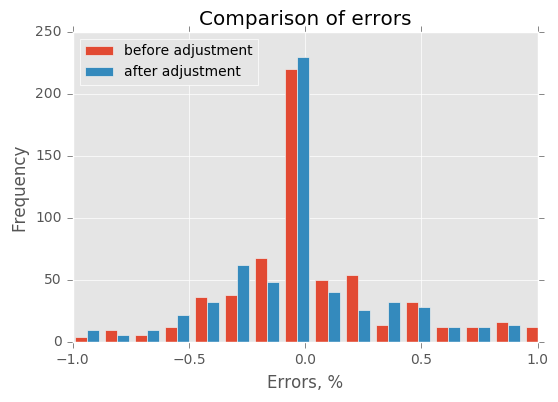

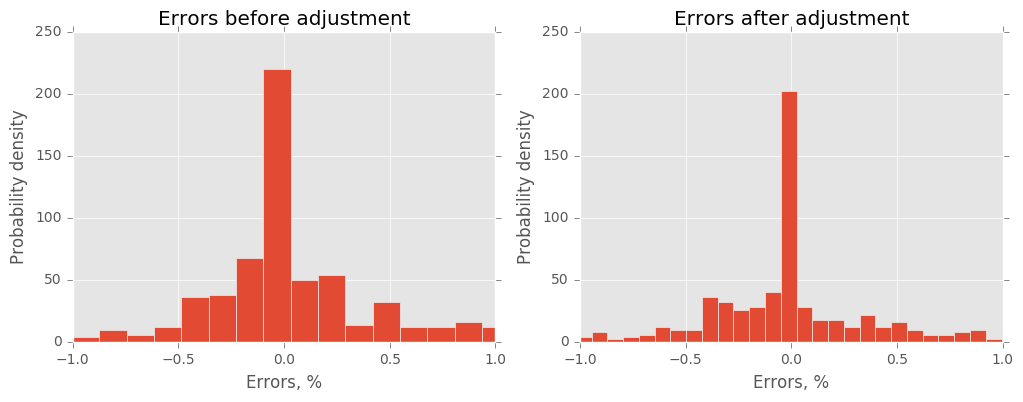

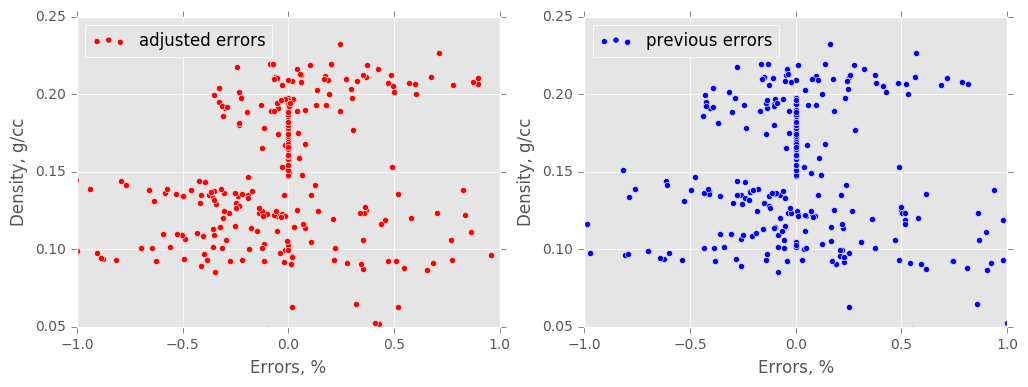

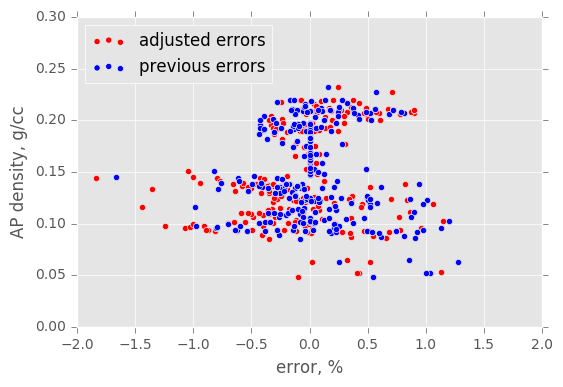

In [24]:
#Plot data
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

#weights = [np.ones_like(previous_errors)/float(len(previous_errors)),np.ones_like(adjusted_errors)/float(len(adjusted_errors))]
plt.hist([previous_errors, adjusted_errors], stacked = False, bins = 40, label = ['before adjustment', 'after adjustment'])
plt.legend(prop={'size': 10},loc="upper left")
plt.ylabel('Frequency')
plt.xlabel('Errors, %')
plt.xlim(-1,1)
plt.title('Comparison of errors')
plt.show()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
ax1.hist(previous_errors, bins = 40)
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Errors, %')
ax1.set_xlim(-1,1)
ax1.set_title('Errors before adjustment')

ax2.hist(adjusted_errors, bins = 40)
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Errors, %')
ax2.set_xlim(-1,1)
ax2.set_title('Errors after adjustment')
plt.show()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
ax1.scatter(adjusted_errors, AP_density, label='adjusted errors', c='r')
ax1.legend(loc='upper left')
ax2.scatter(previous_errors, AP_density, label='previous errors', c='b')
ax1.set_xlim(-1,1)
ax1.set_ylim(0.05,0.25)
ax1.set_ylabel('Density, g/cc')
ax1.set_xlabel('Errors, %')
ax2.legend(loc='upper left')
ax2.set_xlim(-1,1)
ax2.set_ylim(0.05,0.25)
ax2.set_ylabel('Density, g/cc')
ax2.set_xlabel('Errors, %')
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(adjusted_errors, AP_density, label='adjusted errors', c='r')
ax1.scatter(previous_errors, AP_density, label='previous errors', c='b')
plt.legend(loc='upper left')
plt.xlabel('error, %')
plt.ylabel('AP density, g/cc')
plt.xlim(-2,2)
plt.show()

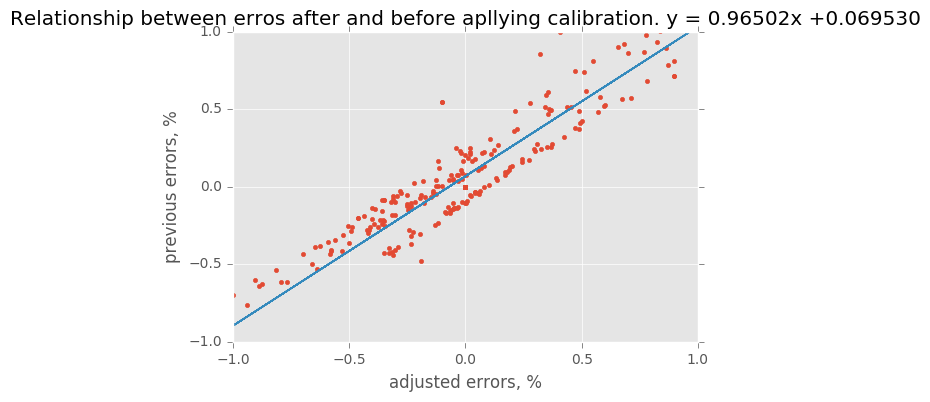

In [18]:
# fit with np.polyfit
m, b = np.polyfit(adjusted_errors,previous_errors,1)
trend = [adjusted_errors[i]*m + b for i in range(len(adjusted_errors))]

plt.plot(adjusted_errors, previous_errors, '.')
plt.plot(adjusted_errors, trend, '-')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('adjusted errors, %')
plt.ylabel('previous errors, %')
plt.title('Relationship between erros after and before apllying calibration. y = '+ str(m)[:7]+'x +'+str(b)[:8])
plt.show()

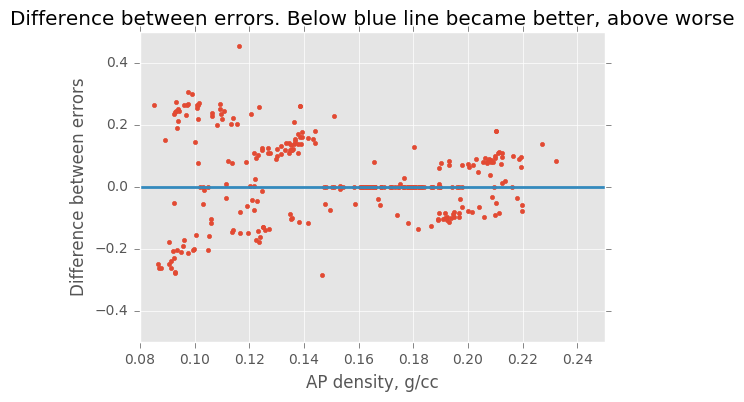

In [10]:
dif = [abs(adjusted_errors[i])-abs(previous_errors[i]) for i in range(len(adjusted_errors))]
plt.plot( AP_density, dif, '.')
plt.plot([0 for i in range(len(AP_density))], '-', linewidth=2)
plt.xlim(0.08,0.25)
plt.ylim(-0.5,0.5)
plt.xlabel('AP density, g/cc')
plt.ylabel('Difference between errors')
plt.title('Difference between errors. Below blue line became better, above worse')
plt.show()

# Conclusions:

Based on error distribution before and after applying of calibration equation can be concluded that volume correction does not have positive effect on a deliverables. Last plot shows differens between errors before and after appling of correction versus density, measured with Anton Paar. Dots above blue lines shows cases when correction had a negative effect, e.g. error became higher after volume correction. Dots below blue lines shows cases when volume correction had a positive effect on a error. Based on this plot positive effect of volume correction was not noticed. 